# 2D Lattice Visualization with Moire Lattice Library

This notebook demonstrates the usage of the `moire_lattice_py` Python bindings for creating and visualizing 2D lattices. We'll explore different lattice types, generate lattice points, and create beautiful visualizations.

## Features Demonstrated:
- Creating various 2D Bravais lattices (square, hexagonal, rectangular, oblique)
- Generating lattice points within specified radii
- Visualizing lattice structures with matplotlib
- Comparing lattice properties and parameters
- Interactive lattice point generation

In [1]:
# Import required libraries
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import warnings

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
warnings.filterwarnings('ignore')

# Add the local package path for development
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'rust-python', 'python'))

print("Setting up moire_lattice_py...")
try:
    import moire_lattice_py as ml
    print(f"Successfully imported moire_lattice_py version {ml.version()}")
except ImportError as e:
    print(f"Failed to import moire_lattice_py: {e}")
    print("\nTo install the Python bindings:")
    print("1. Install maturin: pip install maturin")
    print("2. Build the package: cd ../rust-python && maturin develop")
    raise ImportError("moire_lattice_py not available")

Setting up moire_lattice_py...
Successfully imported moire_lattice_py version 0.1.0


## 1. Creating Different Lattice Types

Let's create various 2D Bravais lattices using the moire_lattice_py library. We'll demonstrate the four main types:

- **Square lattice**: Equal lattice constants, 90° angle
- **Hexagonal lattice**: Equal lattice constants, 60° symmetry  
- **Rectangular lattice**: Different lattice constants, 90° angle
- **Oblique lattice**: Different lattice constants, arbitrary angle

In [2]:
# Create different lattice types
print("Creating lattice structures...")

# Square lattice with lattice constant a = 1.0
square = ml.create_square_lattice(1.0)
print(f"Square lattice: {square}")

# Hexagonal lattice with lattice constant a = 1.0
hex_lattice = ml.create_hexagonal_lattice(1.0)
print(f"Hexagonal lattice: {hex_lattice}")

# Rectangular lattice with a = 1.0, b = 1.5
rect_lattice = ml.create_rectangular_lattice(1.0, 1.5)
print(f"Rectangular lattice: {rect_lattice}")

# Custom oblique lattice: a = 1.0, b = 1.2, angle = 75°
custom = ml.PyLattice2D("oblique", 1.0, 1.2, 75.0)
print(f"Custom oblique lattice: {custom}")

print("\nAll lattices created successfully!")

Creating lattice structures...
Square lattice: PyLattice2D(Square, a=1.000, b=1.000, angle=90.0°)
Hexagonal lattice: PyLattice2D(Hexagonal, a=1.000, b=1.000, angle=120.0°)
Rectangular lattice: PyLattice2D(CenteredRectangular, a=1.000, b=1.500, angle=90.0°)
Custom oblique lattice: PyLattice2D(Oblique, a=1.000, b=1.200, angle=75.0°)

All lattices created successfully!


## 2. Generating Lattice Points

Now let's generate lattice points within specified radii. This demonstrates the high-performance point generation capabilities of the Rust backend.

In [3]:
# Generate lattice points within different radii
print("Generating lattice points...")

radii = [2.0, 3.0, 4.0]
lattice_data = {}

for radius in radii:
    print(f"\nPoints within radius {radius}:")

    # Generate points for each lattice type
    square_points = square.generate_points(radius)
    hex_points = hex_lattice.generate_points(radius)
    rect_points = rect_lattice.generate_points(radius)
    custom_points = custom.generate_points(radius)
    
    # Store data for visualization
    lattice_data[radius] = {
        'square': np.array(square_points),
        'hexagonal': np.array(hex_points),
        'rectangular': np.array(rect_points),
        'oblique': np.array(custom_points)
    }
    
    print(f"  Square: {len(square_points)} points")
    print(f"  Hexagonal: {len(hex_points)} points")
    print(f"  Rectangular: {len(rect_points)} points")
    print(f"  Oblique: {len(custom_points)} points")

print(f"\nExample points from square lattice (radius=3.0):")
print(f"First 10 points: {lattice_data[3.0]['square'][:10].tolist()}")

Generating lattice points...

Points within radius 2.0:
  Square: 12 points
  Hexagonal: 18 points
  Rectangular: 10 points
  Oblique: 10 points

Points within radius 3.0:
  Square: 28 points
  Hexagonal: 36 points
  Rectangular: 18 points
  Oblique: 26 points

Points within radius 4.0:
  Square: 48 points
  Hexagonal: 60 points
  Rectangular: 32 points
  Oblique: 44 points

Example points from square lattice (radius=3.0):
First 10 points: [[-3.0, 0.0], [-2.0, -2.0], [-2.0, -1.0], [-2.0, 0.0], [-2.0, 1.0], [-2.0, 2.0], [-1.0, -2.0], [-1.0, -1.0], [-1.0, 0.0], [-1.0, 1.0]]


## 3. Visualizing Lattice Structures

Let's create beautiful visualizations of our lattice structures. We'll plot the lattice points with their bounding circles to show the generation radius.

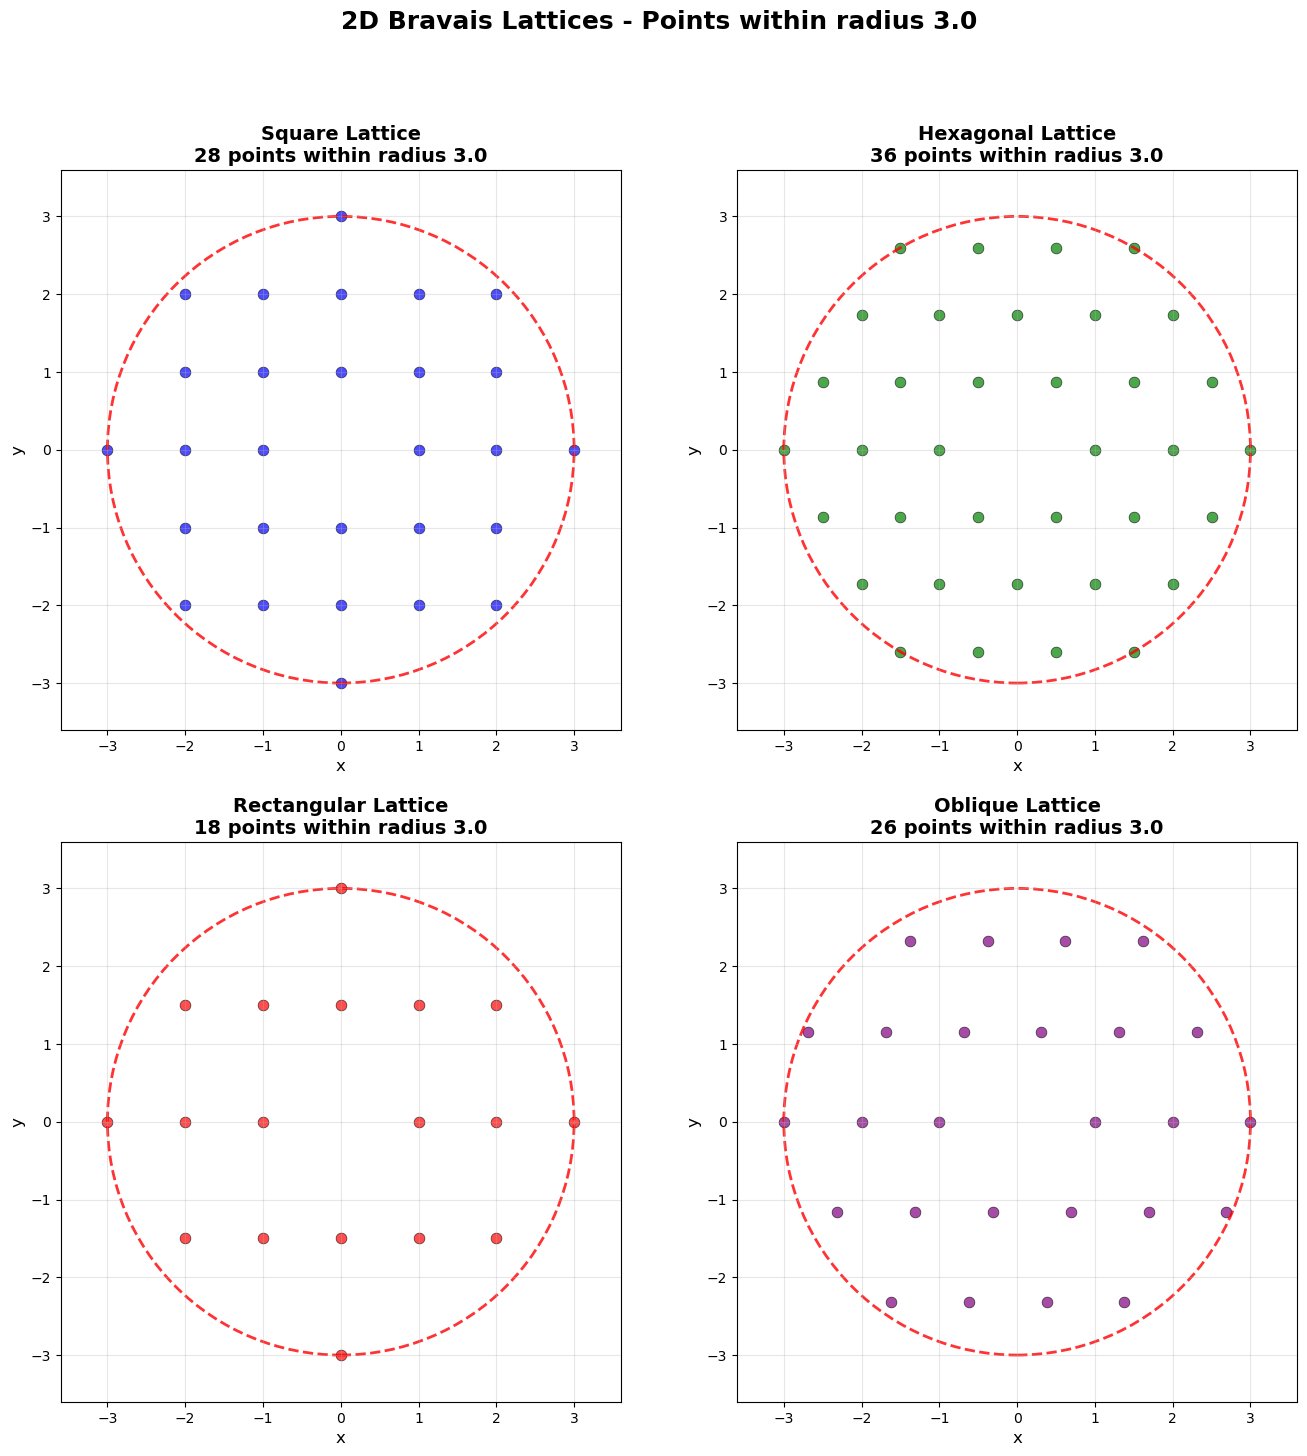

In [4]:
# Create comprehensive lattice visualization
def plot_lattice(points, title, radius, color='blue', ax=None):
    """Plot lattice points with bounding circle"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot lattice points
    if len(points) > 0:
        ax.scatter(points[:, 0], points[:, 1], c=color, s=60, alpha=0.7, edgecolors='black', linewidths=0.5)
    
    # Add bounding circle
    circle = Circle((0, 0), radius, fill=False, color='red', linestyle='--', linewidth=2, alpha=0.8)
    ax.add_patch(circle)
    
    # Formatting
    ax.set_xlim(-radius*1.2, radius*1.2)
    ax.set_ylim(-radius*1.2, radius*1.2)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{title}\n{len(points)} points within radius {radius}', fontsize=14, fontweight='bold')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    
    return ax

# Create a 2x2 subplot for different lattice types
radius = 3.0
colors = ['blue', 'green', 'red', 'purple']
lattice_types = ['square', 'hexagonal', 'rectangular', 'oblique']
titles = ['Square Lattice', 'Hexagonal Lattice', 'Rectangular Lattice', 'Oblique Lattice']

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

for i, (lattice_type, title, color) in enumerate(zip(lattice_types, titles, colors)):
    points = lattice_data[radius][lattice_type]
    plot_lattice(points, title, radius, color, axes[i])

plt.suptitle(f'2D Bravais Lattices - Points within radius {radius}', fontsize=18, fontweight='bold', y=0.98)
plt.show()

## 4. Lattice Properties Analysis

Let's examine the mathematical properties of our lattices, including unit cell areas, lattice vectors, and reciprocal space vectors.

In [5]:
# Analyze lattice properties
print("Lattice Properties Analysis")
print("=" * 50)

lattices = [
    ("Square", square),
    ("Hexagonal", hex_lattice), 
    ("Rectangular", rect_lattice),
    ("Oblique", custom)
]

for name, lattice in lattices:
    print(f"\n{name} Lattice:")
    
    # Unit cell area
    area = lattice.unit_cell_area()
    print(f"  Unit cell area: {area:.4f}")
    
    # Lattice vectors
    vectors = lattice.lattice_vectors()
    print(f"  Lattice vectors: {vectors}")
    
    # Reciprocal vectors
    reciprocal = lattice.reciprocal_vectors()
    print(f"  Reciprocal vectors: {reciprocal}")
    
    # Parameters (for custom lattice)
    if hasattr(lattice, 'get_parameters'):
        params = lattice.get_parameters()
        print(f"  Parameters: {params}")

# Comparison table
print(f"\nUnit Cell Area Comparison:")
print("Lattice Type    | Area")
print("-" * 25)
for name, lattice in lattices:
    area = lattice.unit_cell_area()
    print(f"{name:<15} | {area:.4f}")

Lattice Properties Analysis

Square Lattice:
  Unit cell area: 1.0000
  Lattice vectors: ((1.0, 0.0), (0.0, 1.0))
  Reciprocal vectors: ((6.283185307179586, 0.0), (-0.0, 6.283185307179586))
  Parameters: {'a': 1.0, 'b': 1.0, 'angle': 90.0, 'lattice_type': 'Square'}

Hexagonal Lattice:
  Unit cell area: 0.8660
  Lattice vectors: ((1.0, 0.0), (-0.5, 0.8660254037844386))
  Reciprocal vectors: ((6.283185307179586, 3.627598728468436), (-0.0, 7.255197456936872))
  Parameters: {'a': 1.0, 'b': 0.9999999999999999, 'angle': 120.00000000000001, 'lattice_type': 'Hexagonal'}

Rectangular Lattice:
  Unit cell area: 1.5000
  Lattice vectors: ((1.0, 0.0), (0.0, 1.5))
  Reciprocal vectors: ((6.283185307179586, 0.0), (-0.0, 4.1887902047863905))
  Parameters: {'a': 1.0, 'b': 1.5, 'angle': 90.0, 'lattice_type': 'CenteredRectangular'}

Oblique Lattice:
  Unit cell area: 1.1591
  Lattice vectors: ((1.0, 0.0), (0.3105828541230249, 1.159110991546882))
  Reciprocal vectors: ((6.283185307179586, -1.683574428953

## 5. Point Generation Scaling Analysis

Let's examine how the number of lattice points scales with the radius for different lattice types. This demonstrates the efficiency of the Rust implementation.

Performance Analysis - Point Generation
Radius | Square | Hexagonal | Rectangular | Oblique | Time (ms)
----------------------------------------------------------------------
  1.0  |      4 |         6 |           2 |       2 |    0.04
  1.5  |      8 |         6 |           4 |       6 |    0.04
  2.0  |     12 |        18 |          10 |      10 |    0.05
  2.5  |     20 |        18 |          14 |      16 |    0.06
  3.0  |     28 |        36 |          18 |      26 |    0.09
  3.5  |     36 |        42 |          26 |      32 |    0.12
  4.0  |     48 |        60 |          32 |      44 |    0.12
  4.5  |     68 |        72 |          42 |      52 |    0.16
  5.0  |     80 |        90 |          56 |      70 |    0.19
  5.5  |     96 |       108 |          64 |      82 |    0.23
  6.0  |    112 |       126 |          72 |      98 |    0.31
  6.5  |    136 |       150 |          88 |     114 |    0.30
  7.0  |    148 |       186 |         102 |     134 |    0.34
  7.5  |    176 |  

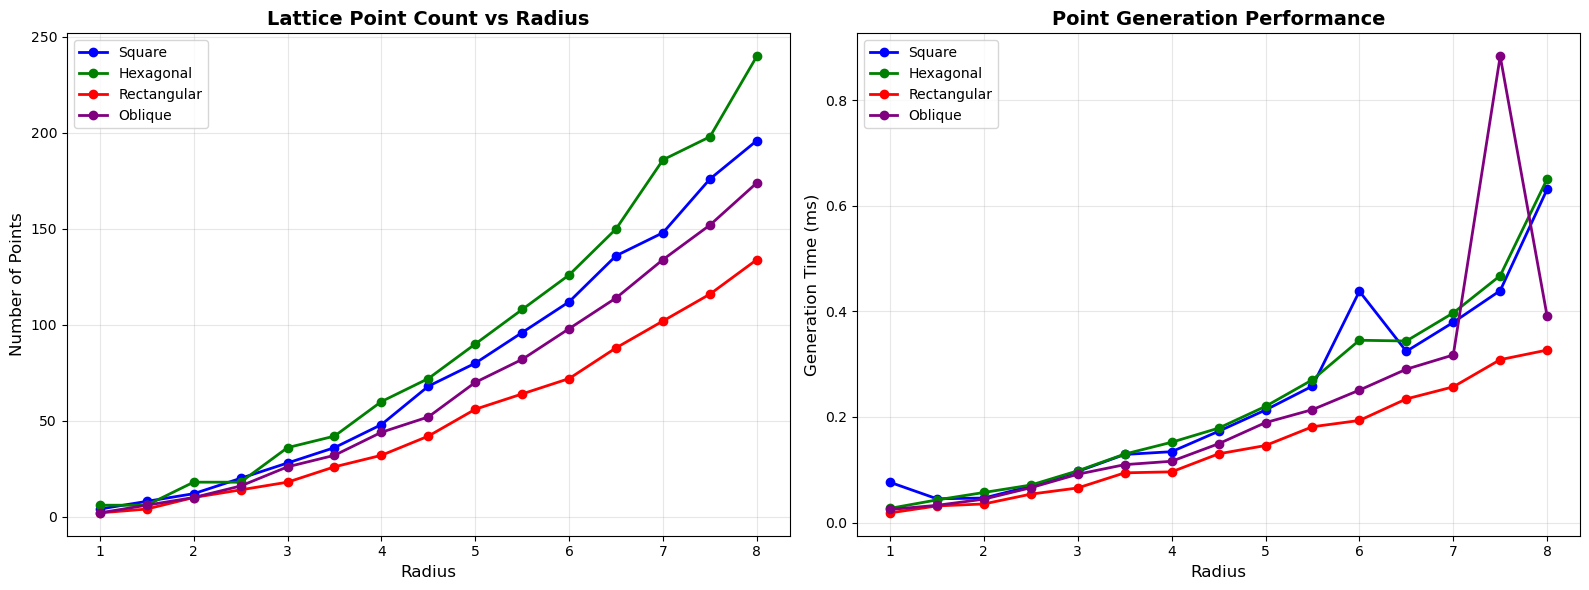

In [7]:
# Performance and scaling analysis
import time

# Test different radii
test_radii = np.linspace(1.0, 8.0, 15)
results = {lattice_type: {'radii': [], 'counts': [], 'times': []} 
          for lattice_type in ['square', 'hexagonal', 'rectangular', 'oblique']}

test_lattices = {
    'square': square,
    'hexagonal': hex_lattice,
    'rectangular': rect_lattice,
    'oblique': custom
}

print("Performance Analysis - Point Generation")
print("Radius | Square | Hexagonal | Rectangular | Oblique | Time (ms)")
print("-" * 70)

for radius in test_radii:
    times = []
    counts = []
    
    for lattice_type, lattice in test_lattices.items():
        start_time = time.time()
        points = lattice.generate_points(radius)
        end_time = time.time()
        
        count = len(points)
        duration = (end_time - start_time) * 1000  # Convert to milliseconds
        
        results[lattice_type]['radii'].append(radius)
        results[lattice_type]['counts'].append(count)
        results[lattice_type]['times'].append(duration)
        
        counts.append(count)
        times.append(duration)
    
    avg_time = np.mean(times)
    print(f"{radius:5.1f}  | {counts[0]:6d} | {counts[1]:9d} | {counts[2]:11d} | {counts[3]:7d} | {avg_time:7.2f}")

# Plot scaling behavior
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot point count vs radius
for lattice_type, color in zip(['square', 'hexagonal', 'rectangular', 'oblique'], colors):
    data = results[lattice_type]
    ax1.plot(data['radii'], data['counts'], 'o-', color=color, label=lattice_type.title(), linewidth=2, markersize=6)

ax1.set_xlabel('Radius', fontsize=12)
ax1.set_ylabel('Number of Points', fontsize=12)
ax1.set_title('Lattice Point Count vs Radius', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot performance vs radius
for lattice_type, color in zip(['square', 'hexagonal', 'rectangular', 'oblique'], colors):
    data = results[lattice_type]
    ax2.plot(data['radii'], data['times'], 'o-', color=color, label=lattice_type.title(), linewidth=2, markersize=6)

ax2.set_xlabel('Radius', fontsize=12)
ax2.set_ylabel('Generation Time (ms)', fontsize=12)
ax2.set_title('Point Generation Performance', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()